# Case Study 1

#### Model selection for Clustering

Clustering is unsupervised learning: the resulting clusters are completely derived from data distributed in given a feature set with no class available

Compared to supervised learning counterparts, it is …
* hard to define model performance (cluster quality)
* sensitive to different clustering algorithms and different feature spaces.



#### Task
Your task is to try different clustering algorithms and also a range of the potential parameter(s) which affect the number of clusters including ..

* K-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Gaussian Mixture Model, 
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* Hierarchical Clustering, 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
* Louvain Clustering, 
https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering

on 5K colorectal patches represented by 4 different representation PathologyGAN, ResNet50, InceptionV3 and VGG16


#### Data and its preprocessing 
5,000 non-overlapping image patches from hematoxylin & eosin (H&E) stained histological images of human colorectal cancer (CRC) and normal tissue.
* 4 feature sets, PathologyGAN, ResNet50, InceptionV3 and VGG16, are extracted to represent those 5,000 images different dimensional feature spaces.
* PCA and UMAP were employed to reduce each feature sapce into 100-dimensional vectors

* 9 tissue types are also available which include Adipose (ADI), background (BACK), debris (DEB), lymphocytes (LYM), mucus (MUC), smooth muscle (MUS), normal colon mucosa (NORM), cancer-associated stroma (STR), colorectal adenocarcinoma epithelium (TUM)


#### Performance Measurement
To assess quality of clustering solutions, several approaches are expected to be done and interpreted which include...
* Silhouette Score for goodness of fit test
* Vmeasure Score for homogeneity and completeness test (tissue type available as ground truth)
* Clusters visualisations

For more information, please have a check...
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation


#### Report
Report on your preprocessing pipeline, theory and intuition behinds each algorithm and representation, parameter searching and performance evaluation frameworks. If there is any addiotional process, give evidences/justifications on how it helps.

#### Required Packages

In [28]:
# !pip install h5py==2.10.0
# !pip install numpy
# !pip install pandas
# !pip install sklearn
# !pip install scikit-network
# !pip install pickle-mixin==1.0.2
# !pip install matplotlib
# !pip install plotly

### Prepare Tissue Representations

In [1]:
import h5py
import numpy as np
import pickle

In [2]:
pge_path = 'colon_nct_feature/pge_dim_reduced_feature.h5'
resnet50_path = 'colon_nct_feature/resnet50_dim_reduced_feature.h5'
inceptionv3_path = 'colon_nct_feature/inceptionv3_dim_reduced_feature.h5'
vgg16_path = 'colon_nct_feature/vgg16_dim_reduced_feature.h5'

pge_content = h5py.File(pge_path, mode='r')
resnet50_content = h5py.File(resnet50_path, mode='r')
inceptionv3_content = h5py.File(inceptionv3_path, mode='r')
vgg16_content = h5py.File(vgg16_path, mode='r')


In [383]:
#pge_content
print(pge_content)
#resnet50_content
inceptionv3_content
#vgg16_content

<HDF5 file "pge_dim_reduced_feature.h5" (mode r)>


<HDF5 file "inceptionv3_dim_reduced_feature.h5" (mode r)>

In [384]:
#PCA feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_pca_feature  = pge_content['pca_feature'][...]
#pge_pca_feature  = pge_content['pca_feature']
resnet50_pca_feature  = resnet50_content['pca_feature'][...]
inceptionv3_pca_feature = inceptionv3_content['pca_feature'][...]
vgg16_pca_feature  = vgg16_content['pca_feature'][...]

In [667]:
#print(len(pge_pca_feature))
print(len(inceptionv3_pca_feature))
#pge_pca_feature
#print(shape(pge_pca_feature))
#vgg16_pca_feature
#inceptionv3_pca_feature

5000


In [386]:
#UMAP feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_umap_feature  = pge_content['umap_feature'][...]
resnet50_umap_feature = resnet50_content['umap_feature'][...]
inceptionv3_umap_feature  = inceptionv3_content['umap_feature'][...]
vgg16_umap_feature  = vgg16_content['umap_feature'][...]

In [387]:
#pge_umap_feature
#resnet50_umap_feature
inceptionv3_umap_feature 
#vgg16_umap_feature

array([[ 9.442139 ,  5.9139   ,  9.8989315, ...,  4.1480665,  7.6359663,
         4.8063664],
       [ 8.769986 ,  2.8380237,  9.285736 , ...,  4.1417894,  7.6421347,
         4.802405 ],
       [ 8.975588 ,  3.5343366,  9.8447   , ...,  4.14904  ,  7.6433487,
         4.8004627],
       ...,
       [ 9.214398 ,  7.7221174, 10.812267 , ...,  4.140541 ,  7.6454005,
         4.808602 ],
       [10.292738 , 10.367887 ,  6.1107297, ...,  4.14451  ,  7.639921 ,
         4.8239584],
       [ 9.563208 ,  9.135032 ,  9.451074 , ...,  4.1409984,  7.644539 ,
         4.8146048]], dtype=float32)

In [388]:
#tissue type as available ground-truth: labels
#filename  = np.squeeze(pge_content['file_name'])
#filename = np.array([str(x) for x in filename])
#labels = np.array([x.split('/')[2] for x in filename])
#labels

filename  = np.squeeze(inceptionv3_content['file_name'])
filename = np.array([str(x) for x in filename])
labels = np.array([x.split('/')[2] for x in filename])
labels

array(['ADI', 'ADI', 'ADI', ..., 'TUM', 'TUM', 'TUM'], dtype='<U4')

# Example

In [9]:
import random

In [668]:
random.seed(0)
print(random.seed(0))
#selected_index = random.sample(list(np.arange(len(pge_pca_feature))), 2000)

#selected_index = random.sample(list(np.arange(len(pge_umap_feature))), 2000)

selected_index_product = random.sample(list(np.arange(len(inceptionv3_umap_feature ))), 2000)

#print(selected_index)
#print(selected_index_product)
#print(len(selected_index))
#print(len(pge_pca_feature))
#print(len(selected_index_product))
print(len(inceptionv3_pca_feature))
print(len(selected_index))

None
5000
2000


In [669]:
#test_data = pge_pca_feature[selected_index]
#test_label = labels[selected_index]
#print(test_label)
#print(len(test_label))
#print(len(labels))

test_data = inceptionv3_umap_feature [selected_index]
test_label = labels[selected_index]
print(test_label)
print(len(test_label))
print(len(labels))

['MUS' 'NORM' 'ADI' ... 'LYM' 'MUC' 'TUM']
2000
5000


### Exploratory Analysis

In [670]:
import plotly.graph_objects as go
import pandas as pd

In [671]:
traces = []
for name in np.unique(labels):
    trace = go.Scatter3d(
        x=test_data[test_label==name,0],
        y=test_data[test_label==name,1],
        z=test_data[test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    traces.append(trace)


data = go.Data(traces)
layout = go.Layout(
            showlegend=True,
    scene=go.layout.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    title="First 3 pricipal components of PathologyGAN's PCA feature",
    legend_title="Legend Title",
)

fig.show()


E:\Develop Tools\ANACONDA\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




### Model training

In [672]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sknetwork.clustering import Louvain


In [673]:
#to create Adjacency matrix for  Louvain clustering
from sklearn.metrics import pairwise_distances 
from sklearn.preprocessing import MinMaxScaler


In [771]:
kmeans_model = KMeans(n_clusters = 2, random_state = 0) #GaussianMixture(), AgglomerativeClustering(), Louvain
#kmeans_assignment = kmeans_model.fit_predict(product_data)
kmeans_assignment = kmeans_model.fit_predict(test_data)


In [903]:
from scipy import sparse
louvain_model = Louvain(resolution = 1.115, modularity = 'Newman',random_state = 0) 
#adjacency_matrix = sparse.csr_matrix(MinMaxScaler().fit_transform(-pairwise_distances(product_data)))
adjacency_matrix = sparse.csr_matrix(MinMaxScaler().fit_transform(-pairwise_distances(test_data)))
louvain_assignment = louvain_model.fit_transform(adjacency_matrix)

### Evaluation and Visualisation

In [904]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.model_selection import KFold, train_test_split

* check out number of clusters/cluster assignment counts

In [905]:
print('Number of clusters from KMeans: %d and from Louvain: %d'%(np.unique(kmeans_assignment).shape[0],np.unique(louvain_assignment).shape[0]))

Number of clusters from KMeans: 2 and from Louvain: 10


In [906]:
kmeans_counts = np.unique(kmeans_assignment, return_counts = True)
louvain_counts = np.unique(louvain_assignment, return_counts = True)

In [907]:
print('Kmeans assignment counts')
pd.DataFrame({'Cluster Index': kmeans_counts[0], 'Number of members':kmeans_counts[1]}).set_index('Cluster Index')

Kmeans assignment counts


,Number of members
Cluster Index,
0,1871
1,129


In [908]:
print('Louvain assignment counts')
pd.DataFrame({'Cluster Index': louvain_counts[0], 'Number of members':louvain_counts[1]}).set_index('Cluster Index')

Louvain assignment counts


,Number of members
Cluster Index,
0,667
1,460
2,311
3,169
4,129
5,95
6,91
7,74
8,2


* Assess goodness of fit by silhouette score and cluster homogeneities by V-measure

In [912]:
kmeans_silhouette = silhouette_score(test_data, kmeans_assignment)
#louvain_silhouette = silhouette_score(product_data, louvain_assignment)
#kmeans_silhouette = silhouette_score(product_data, kmeans_assignment)
louvain_silhouette = silhouette_score(test_data, louvain_assignment)
#kmeans_v_measure = v_measure_score(product_label, kmeans_assignment)
kmeans_v_measure = v_measure_score(test_label, kmeans_assignment)
louvain_v_measure = v_measure_score(test_label, louvain_assignment)
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Kmeans': [kmeans_silhouette, kmeans_v_measure], 'Louvain':[louvain_silhouette, louvain_v_measure]}).set_index('Metrics')

,Kmeans,Louvain
Metrics,,
silhouette,0.604877,0.256356
V-measure,0.132780,0.314369


* Visualise tissue type percentage in two different clustering configurations

In [910]:
def calculate_percent(sub_df, attrib):
    cnt = sub_df[attrib].count()
    output_sub_df = sub_df.groupby(attrib).count()
    return (output_sub_df/cnt)

C:\Users\Chen Hao\AppData\Local\Temp\ipykernel_77776\3588831088.py:29: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



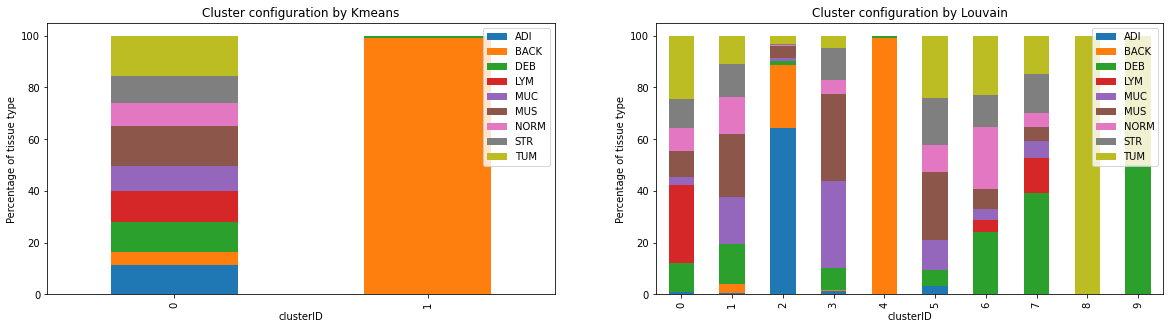

In [911]:
resulted_cluster_df = pd.DataFrame({'clusterID': kmeans_assignment, 'type': test_label})
#resulted_cluster_df = pd.DataFrame({'clusterID': kmeans_assignment, 'type': labels})

label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Kmeans')

resulted_cluster_df = pd.DataFrame({'clusterID': louvain_assignment, 'type': test_label})
label_proportion_df = resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pivoted_label_proportion_df = pd.pivot_table(label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


number_of_tile_df = resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pivoted_label_proportion_df.index
(pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[1] )

axes[1].set_ylabel('Percentage of tissue type')
axes[1].legend(loc='upper right')
axes[1].set_title('Cluster configuration by Louvain')
f.show()